# Customer Segmentation for a Retail Chain

## - Paluvadi Surya Vamsi | 8110020188 | paluvadisurya@gmail.com

![](https://i.imgur.com/kEyeMW2.jpg)

### Description

- The given dataset consists of historical data of a retail chain in different countries. Your Objective is to do the data cleaning, data imputation, data visualization and segment the customers with statistical method and algorithm of your choice and find out
     - Can you identify your best customers?
     - Do you know who your worst customers are?
     - Do you know which customers you just lost, and which ones you’re about to lose?
     - Can you identify loyal customers who buy often, but spend very little?
     - Can you target customers who are willing to spend the most at your store?



### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Customer segmentation for a Retail chain.docx',
 'retail_chain.xlsx',
 'WiseStep_Interview.ipynb']

In [3]:
retailDF = pd.read_excel('retail_chain.xlsx')

In [4]:
retailDF.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retailDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retailDF.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
retailDF = retailDF[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice']]

In [8]:
retailDF.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [9]:
# Copy the Dataframe in case we mess up something
df = retailDF.copy()

In [10]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114
std,1713.600303,218.081158,96.759853
min,12346.000000,-80995.000000,-11062.060000
25%,13953.000000,1.000000,1.250000
50%,15152.000000,3.000000,2.080000
75%,16791.000000,10.000000,4.130000
max,18287.000000,80995.000000,38970.000000


In [11]:
# Stats from Data Frame in case od Object Datatype
df.describe(include=['O'])

,InvoiceNo,StockCode,Country,Description
count,541909,541909,541909,540455
unique,25900,4070,38,4223
top,573585,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,495478,2369


In [12]:
# Drop Duplicated rows of data from the DataFrame, It happened because of Human Error..!! :-p
print("*"*75)
print("Length of DataFrame with duplicate values : ", len(df))
df.drop_duplicates(inplace=True, keep='first')
print("*"*75)
print("Length of DataFrame after dropping all the duplicate values : ", len(df))
print("*"*75)

***************************************************************************
Length of DataFrame with duplicate values :  541909
***************************************************************************
Length of DataFrame after dropping all the duplicate values :  536641
***************************************************************************


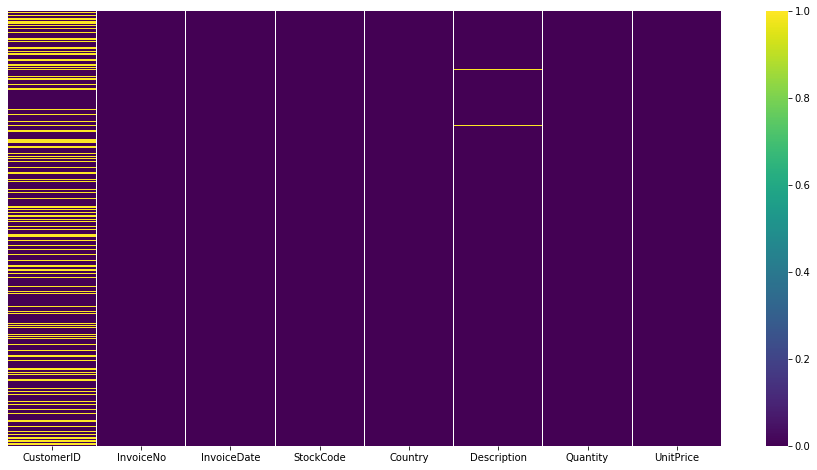

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [14]:
# Creating a Definition for checking missing values.
def mdF():
    total_no = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df))*100
    mdF = pd.concat([total_no, missing_percentage], keys=['Missing_Values', 'Missing_Percentage'], axis=1)
    return mdF[mdF['Missing_Values'] > 1]

In [15]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,135037,25.163377
Description,1454,0.270945


In [16]:
# Drop the entries where both the CustomerID and Description are null values.
df.drop(index=df[df['CustomerID'].isna() & df['Description'].isna()].index, inplace=True)

In [17]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [18]:
df.columns

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice'],
      dtype='object')

In [19]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,133583,24.960061


In [20]:
# The Major Concept is to identify the Customer Categories, situation cannot proceed further with Missing Customer ID's
# Drop the null values in customer ID field
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
CustomerID     401604 non-null float64
InvoiceNo      401604 non-null object
InvoiceDate    401604 non-null datetime64[ns]
StockCode      401604 non-null object
Country        401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
UnitPrice      401604 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [22]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,15281.160818,12.183273,3.474064
std,1714.006089,250.283037,69.764035
min,12346.000000,-80995.000000,0.000000
25%,13939.000000,2.000000,1.250000
50%,15145.000000,5.000000,1.950000
75%,16784.000000,12.000000,3.750000
max,18287.000000,80995.000000,38970.000000


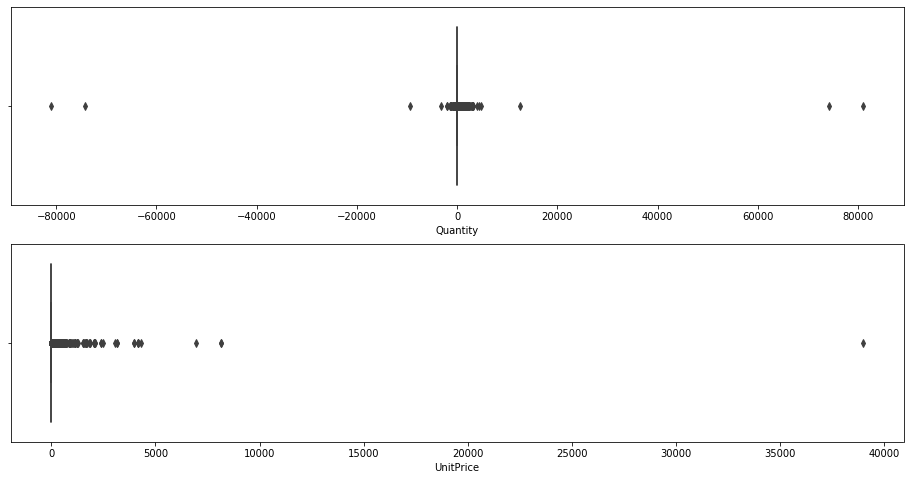

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [24]:
# Quantity & Unit Price should never be negative & not equals to Zero
# Grab the data frame where both the fields are positive in nature
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df))

Length of Dataframe is :  392692


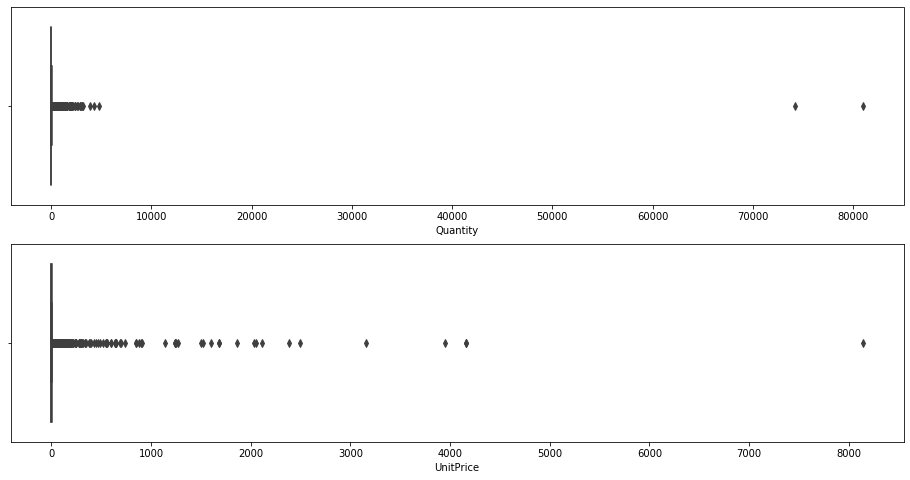

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [26]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,392692.000000,392692.000000,392692.000000
mean,15287.843865,13.119702,3.125914
std,1713.539549,180.492832,22.241836
min,12346.000000,1.000000,0.001000
25%,13955.000000,2.000000,1.250000
50%,15150.000000,6.000000,1.950000
75%,16791.000000,12.000000,3.750000
max,18287.000000,80995.000000,8142.750000


In [27]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [28]:
# Convert the Data Type of CustomerID to Integer using Lambda Function
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))

In [29]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [30]:
# Draw a new column with the total price paid by the customer
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [31]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [32]:
# draw different stats from the time stamps
year = df['InvoiceDate'].apply(lambda x: x.year)
month = df['InvoiceDate'].apply(lambda x: x.month)
weekday = df['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df['InvoiceDate'].apply(lambda x: x.time().minute)

In [33]:
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)

(392692, 392692, 392692, 392692, 392692)

In [34]:
monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month = month.map(monthDict)

In [35]:
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday = weekday.map(day)

In [36]:
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [37]:
df['Year'] = year
df['Month'] = month
df['WeekDay'] = weekday
df['TimePeriod'] = time_hr
df['TimePeriod'] = df['TimePeriod'].apply(lambda x: Period(x))

In [38]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [39]:
df.drop(labels='InvoiceDate', axis=1, inplace=True)

In [40]:
df.head()

,CustomerID,InvoiceNo,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [41]:
df.columns

Index(['CustomerID', 'InvoiceNo', 'StockCode', 'Country', 'Description',
       'Quantity', 'UnitPrice', 'Total_Price', 'Year', 'Month', 'WeekDay',
       'TimePeriod'],
      dtype='object')

In [42]:
df = df[['CustomerID', 'InvoiceNo', 'Year', 'Month', 'WeekDay','TimePeriod',
         'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Price']]

In [43]:
df.head()

,CustomerID,InvoiceNo,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [44]:
# Save the Dataframe into another CSV for safety
df.to_csv("CustomersDF.csv", index=None)

## Exploratory Data Analysis

In [45]:
customerDF = df.copy()

In [46]:
customerDF.head()

,CustomerID,InvoiceNo,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [47]:
customerDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
CustomerID     392692 non-null int64
InvoiceNo      392692 non-null object
Year           392692 non-null int64
Month          392692 non-null object
WeekDay        392692 non-null object
TimePeriod     392692 non-null object
StockCode      392692 non-null object
Country        392692 non-null object
Description    392692 non-null object
Quantity       392692 non-null int64
UnitPrice      392692 non-null float64
Total_Price    392692 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 38.9+ MB


In [48]:
customerDF.describe()

,CustomerID,Year,Quantity,UnitPrice,Total_Price
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,15287.843865,2010.934631,13.119702,3.125914,22.631500
std,1713.539549,0.247177,180.492832,22.241836,311.099224
min,12346.000000,2010.000000,1.000000,0.001000,0.001000
25%,13955.000000,2011.000000,2.000000,1.250000,4.950000
50%,15150.000000,2011.000000,6.000000,1.950000,12.450000
75%,16791.000000,2011.000000,12.000000,3.750000,19.800000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000


In [49]:
customerDF.describe(include=['O'])

,InvoiceNo,Month,WeekDay,TimePeriod,StockCode,Country,Description
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,12,6,3,3665,37,3877
top,576339,November,Thursday,Afternoon,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,542,63168,79243,231998,2023,349203,2016


### 01 - Best Customers
- Best Customers are who have paid more to the company/service and continuously purchasing the products.

![](https://i.imgur.com/JwdQVHW.jpg)

#### Top 30 Customers of our Retail Chain are

In [50]:
best_customers = customerDF.groupby(by='CustomerID')['Total_Price'].sum().sort_values(ascending=False)[:30]

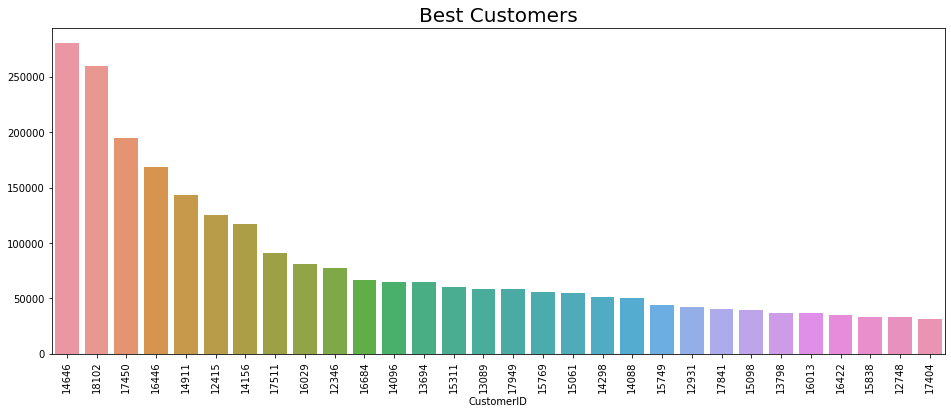

In [51]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title("Best Customers", fontsize=20)
sns.barplot(best_customers.index, best_customers.values, order=best_customers.index)

## 02 - Worst Customers
- Every Customer is a Good Customer, the worst could be measured in terms of loyalty
- Every penny recieved from the customer is an achievement and the hardwork of the company.

## 03 - Periodical Purchasing Stats

In [52]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)
plt.subplot(221)
sns.countplot(customerDF['Year'])
plt.subplot(222)
plt.xticks(rotation=90)
sns.countplot(customerDF['Month'], order=customerDF['Month'].value_counts().index, hue=customerDF['Year'])
plt.subplot(223)
sns.countplot(customerDF['WeekDay'], order=customerDF['WeekDay'].value_counts().index)
plt.subplot(224)
sns.countplot(customerDF['TimePeriod'], order=customerDF['TimePeriod'].value_counts().index)

#### Insights from the Periodical Plots
- Sales are very high in October, November & December
- We have only December sales data from 2010
- The Retail Store is Closed on Saturday as per the Information available
- More number of sales are happening during Middle of the week(Tuesday, Wednesday and Thursday in ascending order respectively)
- People are usually visiting the store during the afternoon hours when compared to Mornng & Evening Times
- The total no of sales in December 2010 is higher then December 2011
- Management has to concentrate on the decrease of sales in December

#### Most Revenue Geneerated WeekDay

In [53]:
weekly_sales = customerDF.groupby(by='WeekDay')['Total_Price'].sum().sort_values(ascending=False)

In [54]:
sns.barplot(weekly_sales.index, weekly_sales.values, order=weekly_sales.index)

- On Thursday Company is generating the highest Revenue
- On Sunday company is generating less revenue

## 04 - Purchase Stats

#### - Regional Purchase Information

In [55]:
country_sales = customerDF.groupby(by='Country')['Total_Price'].sum().sort_values(ascending=False)

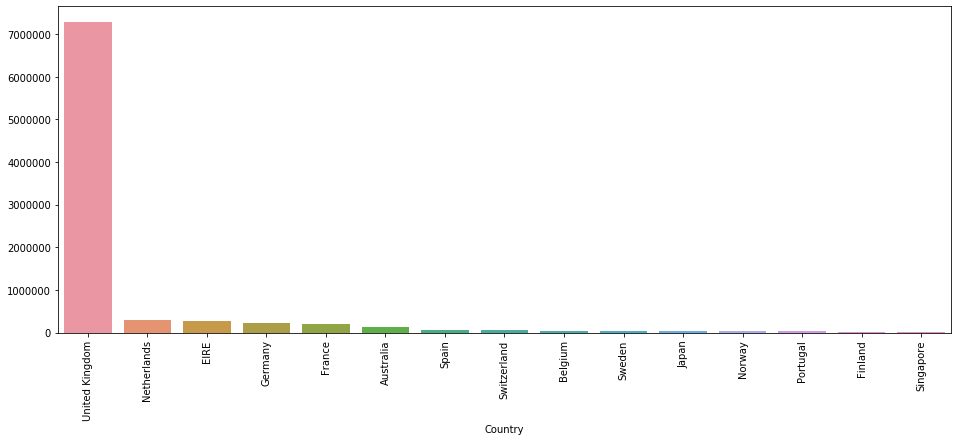

In [56]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.barplot(country_sales[:15].index, country_sales[:15].values)

In [57]:
sales = df.groupby(by='Country').agg({'Quantity' : 'sum', 
                                      'Total_Price' : 'sum'}).sort_values(by=['Quantity'], ascending=False)

#### Top Purchasing Countries

In [58]:
sales[:10]

,Quantity,Total_Price
Country,,
United Kingdom,4241305,7.285025e+06
Netherlands,200361,2.854463e+05
EIRE,140133,2.652625e+05
Germany,119154,2.286784e+05
France,111428,2.089343e+05
Australia,83891,1.384538e+05
Sweden,36078,3.836783e+04
Switzerland,30082,5.644395e+04
Spain,27933,6.155856e+04


#### Lease Purchasing Countries

In [59]:
sales[-10:].sort_values(by=['Total_Price'])

,Quantity,Total_Price
Country,,
Saudi Arabia,80,145.92
Bahrain,260,548.40
Czech Republic,671,826.74
RSA,351,1002.31
Brazil,356,1143.60
European Community,499,1300.25
Lithuania,652,1661.06
Lebanon,386,1693.88
United Arab Emirates,982,1902.28


## 05 - Product Sales Categorization

In [60]:
product_sales = customerDF.groupby(by='Description')['Quantity'].sum().sort_values(ascending=False)

#### WordCloud for Products

In [61]:
from wordcloud import WordCloud

In [62]:
text = " ".join(df['Description'].values.tolist())
img = WordCloud(width=1920, height=1080,
                background_color='white', max_words=60).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(img)

#### Top 20 Sold Products

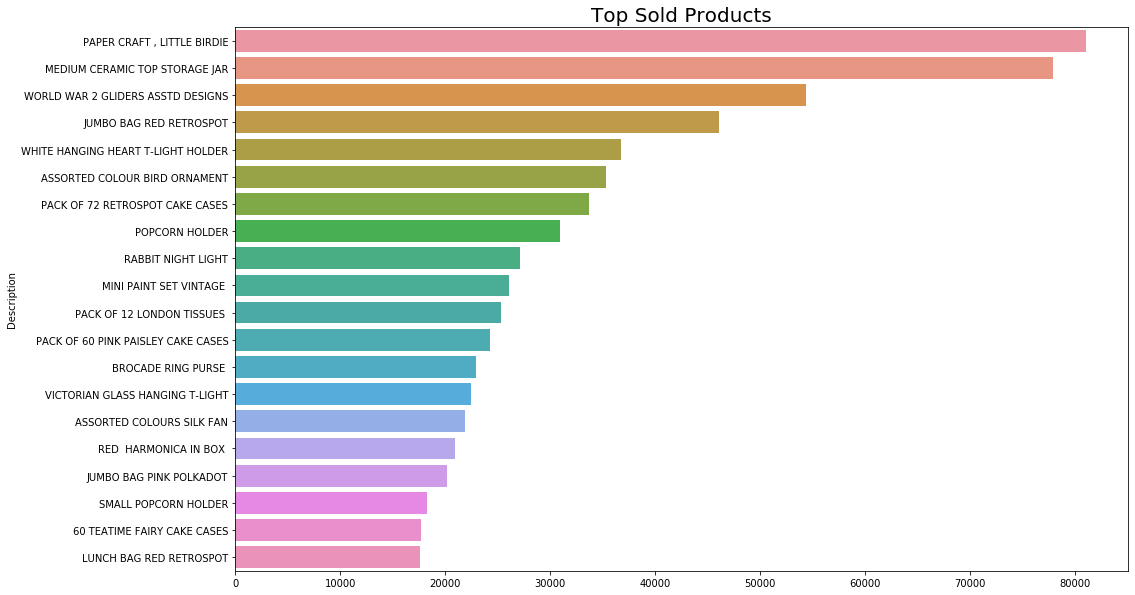

In [63]:
plt.figure(figsize=(16,10))
plt.title("Top Sold Products", fontsize=20)
sns.barplot(product_sales[:20].values, product_sales[:20].index)

#### Most Revenue Generated Products

In [64]:
product_revenue = customerDF.groupby(by='Description')['Total_Price'].sum().sort_values(ascending=False)

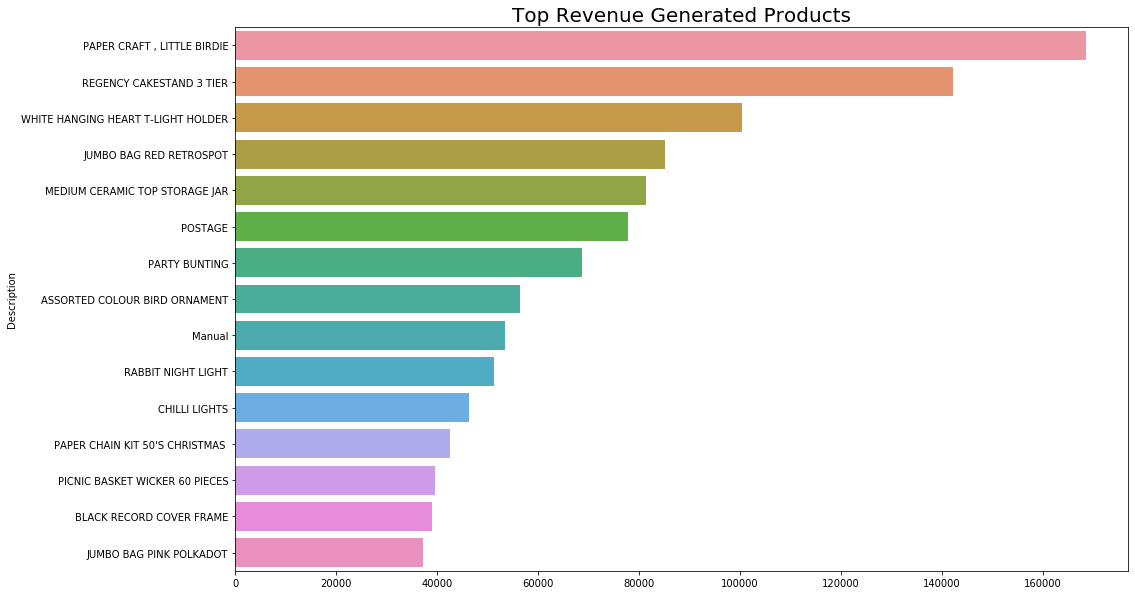

In [65]:
plt.figure(figsize=(16,10))
plt.title("Top Revenue Generated Products", fontsize=20)
sns.barplot(product_revenue[:15].values, product_revenue[:15].index)

## 06 - Customers Stats (Loyalty, Daily Buyer)

- Customer loyalty is the act of choosing one company's products and services consistently over their competitors. When a customer is loyal to one company, they aren't easily swayed by price or availability. They would rather pay more and ensure the same quality service & product they know
- Since we don't have the purchase stats of our customers with the other companies, Let us seggregate them into 3 Categories based on thier purchases as Bronze, Silver and Gold

In [66]:
loyal_customers = customerDF.groupby(by='CustomerID')['Quantity'].sum().sort_values(ascending=False)

#### Customers Who are willing to purchase most from the store

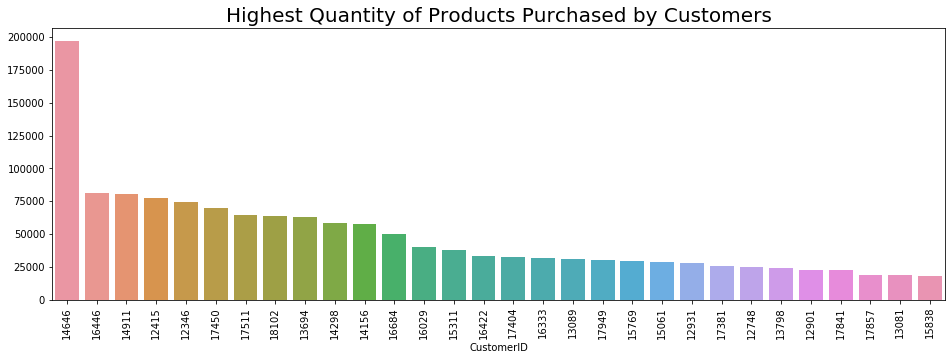

In [67]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.title("Highest Quantity of Products Purchased by Customers", fontsize=20)
sns.barplot(loyal_customers[:30].index, loyal_customers[:30].values, order=loyal_customers[:30].index)

In [68]:
loyal_customers.describe()

count      4338.000000
mean       1187.644537
std        5043.619654
min           1.000000
25%         159.000000
50%         378.000000
75%         989.750000
max      196915.000000
Name: Quantity, dtype: float64

In [69]:
def Loyalty(x):
    if x<500:
        return "Bronze"
    elif 500 <= x < 1000:
        return "Silver"
    elif x >= 1000:
        return "Gold"

In [70]:
loyal_customers_categories = loyal_customers.apply(lambda x: Loyalty(x))

#### Loyal Customers

In [71]:
loyal_customers_categories.value_counts()

Bronze    2509
Gold      1073
Silver     756
Name: Quantity, dtype: int64

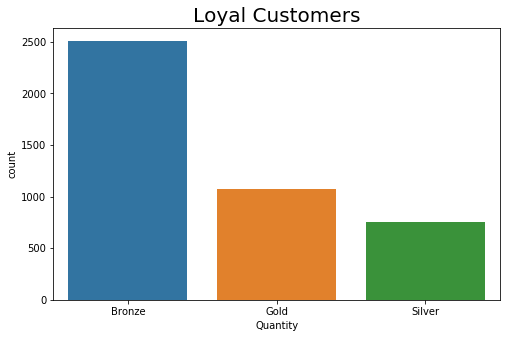

In [72]:
plt.figure(figsize=(8,5))
plt.title("Loyal Customers", fontsize=20)
sns.countplot(loyal_customers_categories, order=loyal_customers_categories.value_counts().index)

## 07 - Customers Who Buy Often, But Spend Very Little

#### Purchases Generated by Customers

In [73]:
daily_customers = customerDF.groupby(by='CustomerID').agg(
    {"InvoiceNo" : "nunique","Total_Price" : 'sum'}).sort_values(by=['InvoiceNo', 'Total_Price'], ascending=[False, True])

# Considering 20,000 is less payment from Daily Customers
daily_customers = daily_customers[daily_customers['Total_Price'] < 20000]
daily_customers.head()

,InvoiceNo,Total_Price
CustomerID,,
14606,93,12076.15
12971,86,11189.91
14527,55,8507.13
15039,47,19766.59
15189,41,16225.39


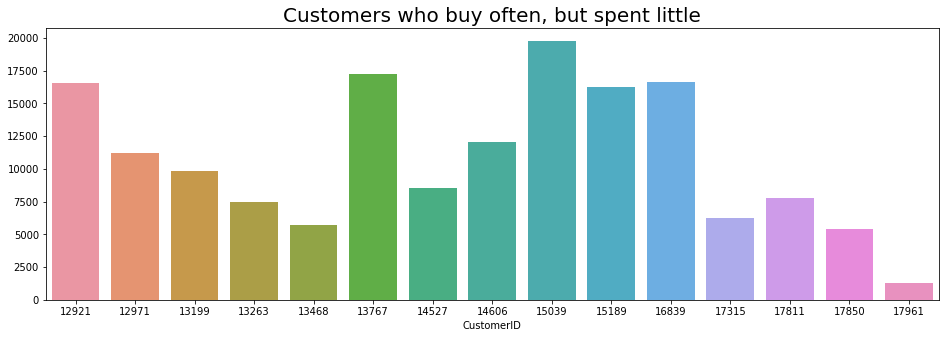

In [74]:
plt.figure(figsize=(16,5))
plt.title("Customers who buy often, but spent little", fontsize = 20)
sns.barplot(daily_customers['Total_Price'][:15].index,
            daily_customers['Total_Price'][:15].values)

## 08 - Customers We have Lost

In [75]:
lost_customers = customerDF[customerDF['Year'] == 2011].groupby(by='Month')['CustomerID'].nunique()

In [76]:
lost_customers

Month
April         856
August        935
December      615
February      758
January       741
July          949
June          991
March         974
May          1056
November     1664
October      1364
September    1266
Name: CustomerID, dtype: int64

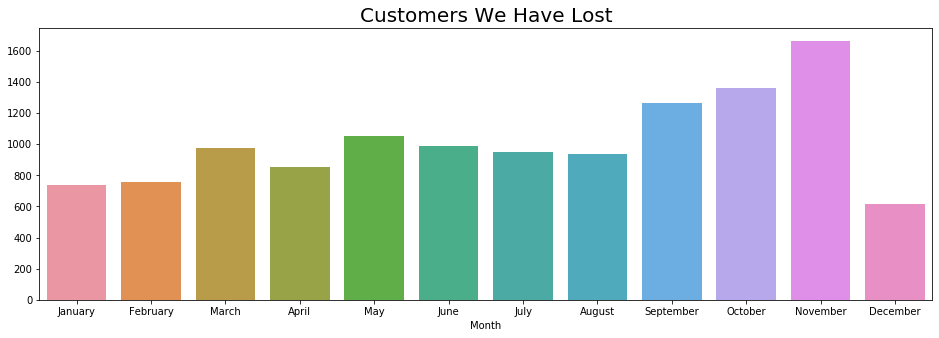

In [77]:
plt.figure(figsize=(16,5))
plt.title('Customers We Have Lost', fontsize = 20)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(lost_customers.index, lost_customers.values, order=months)

- We can observe that very number of customers are lost visiting the store. At the end of the year many customers are lost.